## Observations and Insights 

In [185]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Homework5_Mouse_metadata.csv"
study_results_path = "Resources/Homework5_Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Read the mouse data and the study results
study_results.head()

# Combine the data into a single dataset
mouses_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouses_df.head(50)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
len(mouses_df)

1893

In [4]:
# Checking the number of mice in the DataFrame.
mouses_num=mouses_df.groupby(["Mouse ID"])
mouses_num.count().count()
Time=mouses_df.groupby(["Timepoint"])
Time.count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,,
0,250,250,250,250,250,250,250
5,238,238,238,238,238,238,238
10,223,223,223,223,223,223,223
15,207,207,207,207,207,207,207
20,195,195,195,195,195,195,195
25,183,183,183,183,183,183,183
30,171,171,171,171,171,171,171
35,154,154,154,154,154,154,154
40,142,142,142,142,142,142,142


In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouses_dup= mouses_df[mouses_df.duplicated(['Mouse ID', 'Timepoint'])]
mouses_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup=mouses_df.loc[mouses_df["Mouse ID"]=="g989"]
Dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouses_df2=mouses_df.set_index('Mouse ID')
mouses_df2
mouses_clean=mouses_df2.drop(index='g989')

In [8]:
# Checking the number of mice in the clean DataFrame.
len(mouses_clean)

1880

In [18]:
mouses_clean

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
DR_mean=(mouses_clean.groupby(["Drug Regimen"]))["Tumor Volume (mm3)"].mean()
DR_mean
DR_median=(mouses_clean.groupby(["Drug Regimen"]))["Tumor Volume (mm3)"].median()
DR_median
DR_var=(mouses_clean.groupby(["Drug Regimen"]))["Tumor Volume (mm3)"].var()
DR_var
DR_std=(mouses_clean.groupby(["Drug Regimen"]))["Tumor Volume (mm3)"].std()
DR_std
DR_sem=(mouses_clean.groupby(["Drug Regimen"]))["Tumor Volume (mm3)"].sem()
DR_sem

Results=pd.DataFrame({"Average Tumor Volume":DR_mean,
                     "Median Tumor Volume":DR_median,
                     "Tumor Volume Variance":DR_var,
                     "Tumor Volume Variance STD":DR_std,
                     "Tumor Volume standar errors":DR_sem})
Results

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Variance STD,Tumor Volume standar errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
Data_mouse=mouses_clean.reset_index()
Data_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Bar Plots

In [97]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

DR=(Data_mouse.groupby(["Drug Regimen"]))["Mouse ID"].count()
Mouse_drug=(pd.DataFrame(DR)).reset_index()
Mouse_count=Mouse_drug["Mouse ID"]
Drug=Mouse_drug["Drug Regimen"]


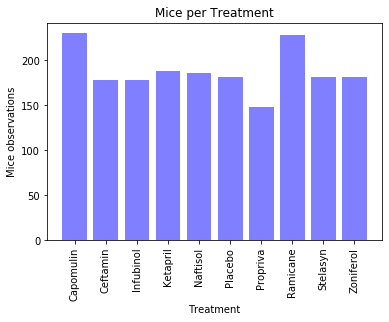

In [110]:
plt.bar(Drug, Mouse_count, color='b', alpha=0.5, align="center")
plt.title("Mice per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Mice observations")
plt.xticks(rotation='vertical')
plt.show()

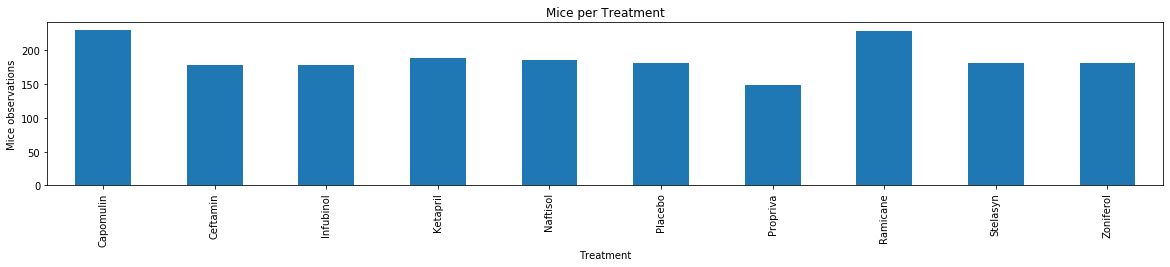

In [109]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
DR.plot(kind="bar",figsize=(20,3))
plt.title("Mice per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Mice observations")
plt.xticks(rotation='vertical')
plt.show()


## Pie Plots

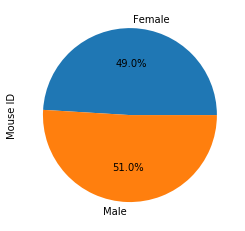

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Pie_data=(Data_mouse.groupby(["Sex"]))["Mouse ID"].count()
Pie_data.plot.pie(y="Mouse ID",subplots=True,autopct="%1.1f%%" )
plt.show()

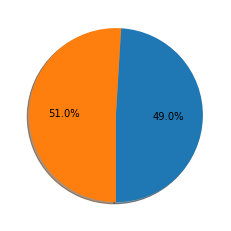

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Pie_data, autopct="%1.1f%%", shadow=True, startangle=270)
plt.show()

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
Box_data=Data_mouse.groupby("Mouse ID").max()
Box_data=Box_data.reset_index()
Box_merge=pd.merge(Box_data[["Mouse ID", "Timepoint"]], Data_mouse, on=["Mouse ID", "Timepoint"], how="left")
Box_ca=Box_merge.loc[Box_merge["Drug Regimen"]=="Capomulin",:]
Box_tum_ca=Box_ca["Tumor Volume (mm3)"]
quartiles=Box_tum_ca.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
IQR=upperq-lowerq
lower_bound=lowerq-(1.5*IQR)
upper_bound=upperq+(1.5*IQR)

#outliers=Box_ca.loc[(Box_ca["Tumor Volume (mm3)"])>upper_bound & (Box_ca["Tumor Volume (mm3)"])<lower_bound]

print(f"The IQR of the final tumor is: {IQR}")
#print(f"The outliers are: {outliers}")

The IQR of the final tumor is: 7.781863460000004


In [134]:
Box_data=Data_mouse.groupby("Mouse ID").max()
Box_data=Box_data.reset_index()
Box_merge=pd.merge(Box_data[["Mouse ID", "Timepoint"]], Data_mouse, on=["Mouse ID", "Timepoint"], how="left")
Box_ra=Box_merge.loc[Box_merge["Drug Regimen"]=="Ramicane",:]
Box_tum_ra=Box_ra["Tumor Volume (mm3)"]
quartiles=Box_tum_ra.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
IQR=upperq-lowerq
lower_bound=lowerq-(1.5*IQR)
upper_bound=upperq+(1.5*IQR)

print(f"The IQR of the final tumor is: {IQR}")

The IQR of the final tumor is: 9.098536719999998


In [136]:
Box_data=Data_mouse.groupby("Mouse ID").max()
Box_data=Box_data.reset_index()
Box_merge=pd.merge(Box_data[["Mouse ID", "Timepoint"]], Data_mouse, on=["Mouse ID", "Timepoint"], how="left")
Box_in=Box_merge.loc[Box_merge["Drug Regimen"]=="Infubinol",:]
Box_tum_in=Box_in["Tumor Volume (mm3)"]
quartiles=Box_tum_in.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
IQR=upperq-lowerq
lower_bound=lowerq-(1.5*IQR)
upper_bound=upperq+(1.5*IQR)

print(f"The IQR of the final tumor is: {IQR}")

The IQR of the final tumor is: 11.477135160000003


In [139]:
Box_data=Data_mouse.groupby("Mouse ID").max()
Box_data=Box_data.reset_index()
Box_merge=pd.merge(Box_data[["Mouse ID", "Timepoint"]], Data_mouse, on=["Mouse ID", "Timepoint"], how="left")
Box_ce=Box_merge.loc[Box_merge["Drug Regimen"]=="Ceftamin",:]
Box_tum_ce=Box_ce["Tumor Volume (mm3)"]
quartiles=Box_tum_ce.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
IQR=upperq-lowerq
lower_bound=lowerq-(1.5*IQR)
upper_bound=upperq+(1.5*IQR)

print(f"The IQR of the final tumor is: {IQR}")

The IQR of the final tumor is: 15.577752179999997


In [188]:
#Box_ce.boxplot("Tumor Volume (mm3)")

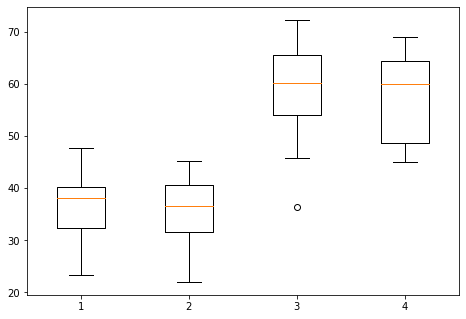

In [147]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
df=[Box_tum_ca, Box_tum_ra, Box_tum_in, Box_tum_ce]
ax = fig.add_axes([0,0,1,1])
Boxplots= ax.boxplot(df)


## Line and Scatter Plots

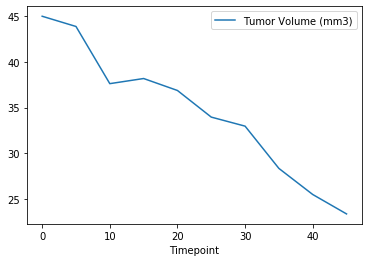

In [166]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Data_line_Capomulin=(Data_mouse.loc[Data_mouse["Drug Regimen"]=="Capomulin"])
Data_line=Data_line_Capomulin.loc[Data_line_Capomulin["Mouse ID"]== "s185"].groupby("Timepoint").sum()
Data_line=Data_line.reset_index()
Data_line.plot("Timepoint","Tumor Volume (mm3)")

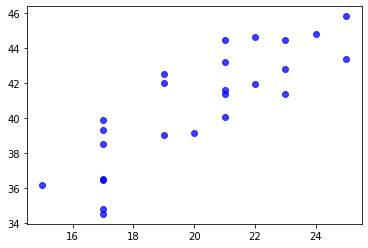

In [182]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Data_sc_Capomulin=(Data_mouse.loc[Data_mouse["Drug Regimen"]=="Capomulin"])
Data_tv=(Data_sc_Capomulin.groupby(["Mouse ID"]))["Tumor Volume (mm3)"].mean()
Data_we=(Data_sc_Capomulin.groupby(["Mouse ID"]))["Weight (g)"].mean()
plt.scatter(Data_we, Data_tv, marker="o", facecolors="blue", edgecolor="blue",
           alpha=0.75)

## Correlation and Regression

In [183]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Data_tv=(Data_sc_Capomulin.groupby(["Mouse ID"]))["Tumor Volume (mm3)"].mean()
Data_we=(Data_sc_Capomulin.groupby(["Mouse ID"]))["Weight (g)"].mean()
correlation=st.pearsonr(Data_tv,Data_we)
print(f"the correlation between both factors is {round(correlation[0],2)}")

the correlation between both factors is 0.84


In [186]:
x_values = Data_we
y_values = Data_tv
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'